In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
import numpy as np

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
len(np.unique(y_train))

10

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

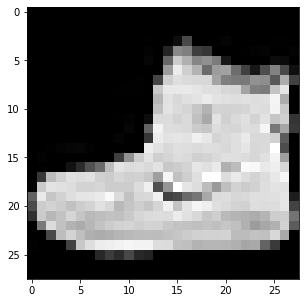

In [9]:
fig = plt.figure(figsize = (5,5))
plt.imshow(x_train[0],cmap = matplotlib.cm.gray)
plt.show()

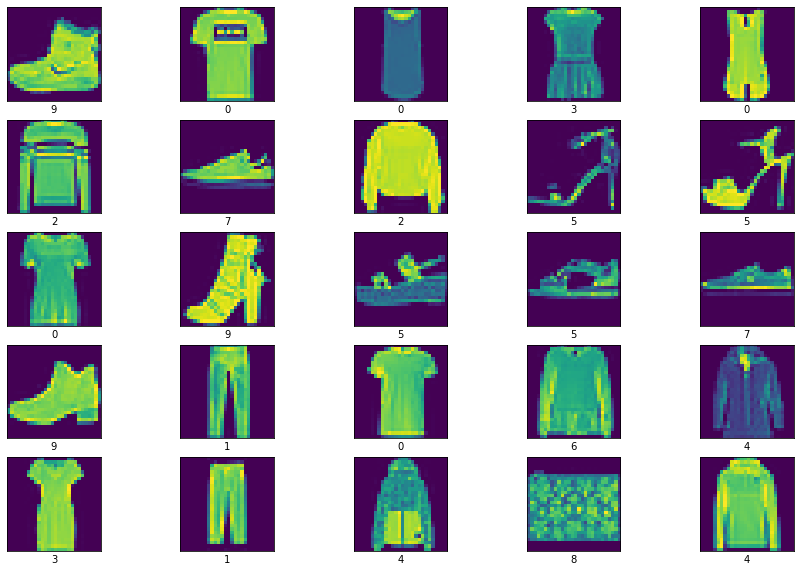

In [10]:
fig =plt.figure(figsize =(15,10)) # first 25 records
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])

In [11]:
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras import Sequential

In [12]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'sigmoid'))
model.add(Dense(10,activation = 'softmax'))

In [13]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [14]:
history = model.fit(x_train,y_train,epochs = 100,verbose =1,batch_size=30,validation_split = 0.2)

Epoch 1/10
1600/1600 [==============================] - 4s 2ms/step - loss: 0.5722 - accuracy: 0.8065 - val_loss: 0.4592 - val_accuracy: 0.8318
Epoch 2/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4055 - accuracy: 0.8538 - val_loss: 0.3896 - val_accuracy: 0.8594
Epoch 3/10
1600/1600 [==============================] - 4s 2ms/step - loss: 0.3675 - accuracy: 0.8680 - val_loss: 0.3582 - val_accuracy: 0.8721
Epoch 4/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3429 - accuracy: 0.8765 - val_loss: 0.3550 - val_accuracy: 0.8709
Epoch 5/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3218 - accuracy: 0.8825 - val_loss: 0.3297 - val_accuracy: 0.8813
Epoch 6/10
1600/1600 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.8893 - val_loss: 0.3394 - val_accuracy: 0.8733
Epoch 7/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.2919 - accuracy: 0.8924 - val_loss: 0.3258 - val_accuracy:

In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8773


[0.3414158821105957, 0.8773000240325928]

In [16]:
y_pred = model.predict(x_test)
y_pred

313/313 [==============================] - 0s 851us/step


array([[3.6866472e-06, 2.2281407e-07, 1.8701917e-06, ..., 1.1283031e-02,
        2.5966254e-04, 9.7266734e-01],
       [2.2828508e-04, 1.8722908e-08, 9.9429238e-01, ..., 2.3528603e-06,
        4.5476522e-06, 4.7911215e-08],
       [8.6613269e-05, 9.9987388e-01, 3.2839828e-06, ..., 1.5564940e-08,
        1.3676446e-06, 9.7311670e-10],
       ...,
       [1.9145969e-02, 2.1726014e-07, 1.5057039e-03, ..., 2.3480337e-05,
        9.5110345e-01, 2.1559696e-07],
       [3.9496558e-06, 9.9960333e-01, 5.5069722e-07, ..., 5.1285873e-08,
        8.8288482e-07, 2.0070672e-07],
       [3.6658491e-06, 2.8129176e-07, 1.4763825e-05, ..., 2.4976037e-03,
        8.5181795e-04, 5.5295591e-06]], dtype=float32)

In [17]:
np.argmax(y_pred[45])

7

In [18]:
y_test[45]

7

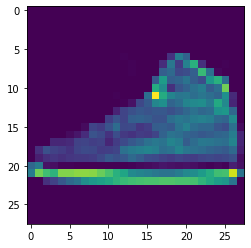

In [19]:
plt.imshow(x_test[45])

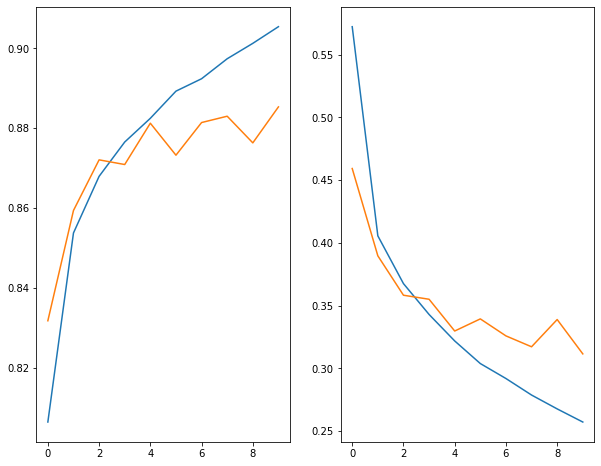

In [21]:
fig = plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
y_pred_all = [np.argmax(i) for i in y_pred]

In [ ]:
#confusion matrix
cm = tf.math.confusion_matrix(y_test,y_pred_all)

import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()